In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [3]:
fruits = pd.read_csv('data/fruit_data_with_colors.txt', sep = '\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [5]:
print(fruits.shape)

(59, 7)


### Statistical summary

In [6]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


The numerical values do not have the same scale. We need to apply scaling to the test set that we computed for the training set

### Distribution of Fruit types

In [7]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


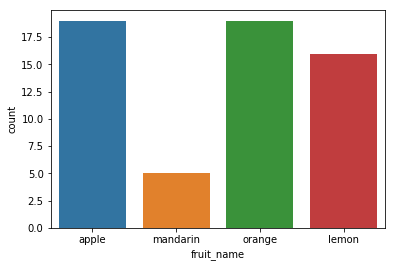

In [10]:
import seaborn as sns
sns.countplot(fruits['fruit_name'], label='Count')
plt.show()

The data seems pretty balanced except maybe mandarin. The box plot of each numeric variable will give us a clear idea of the distribution of the input variables.

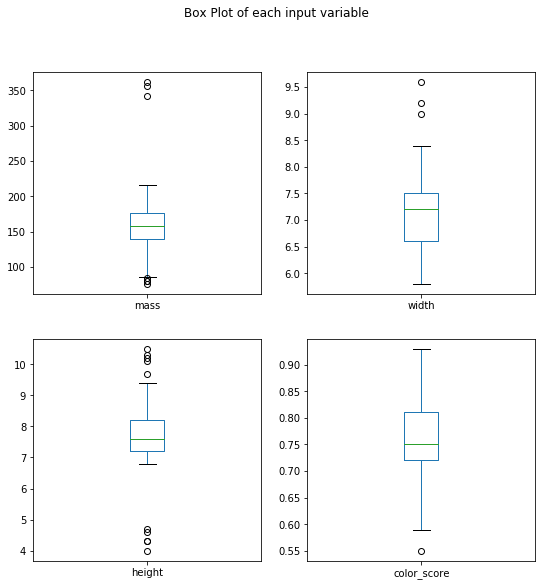

In [11]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title= 'Box Plot of each input variable')
plt.savefig('images/fruits_boxplot')
plt.show()

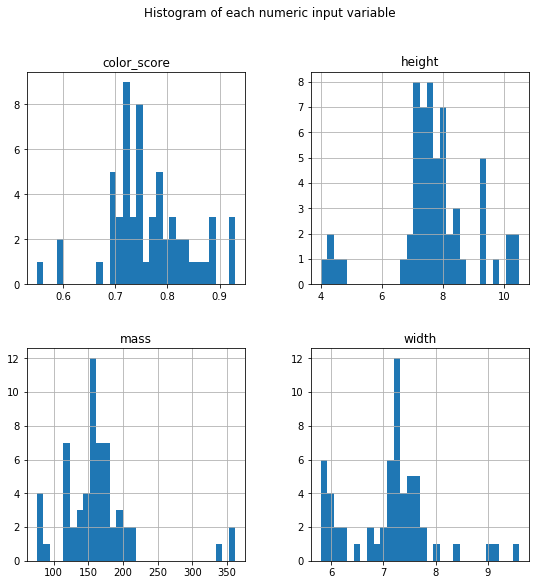

In [12]:
import pylab as pl
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle('Histogram of each numeric input variable')
plt.savefig('images/fruits_hist')
plt.show()

We observe that __color_score__ follows a nearly Gaussian distribution

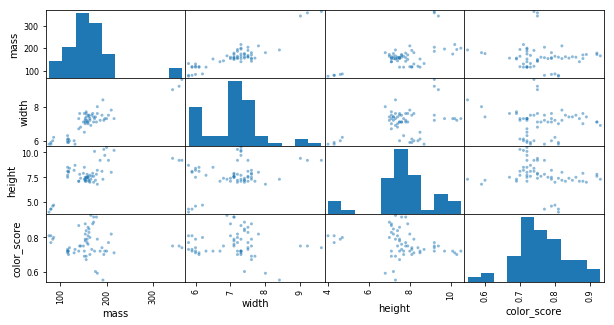

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10,5))
plt.savefig('images/fruits_scatter_matrix')
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

In [14]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

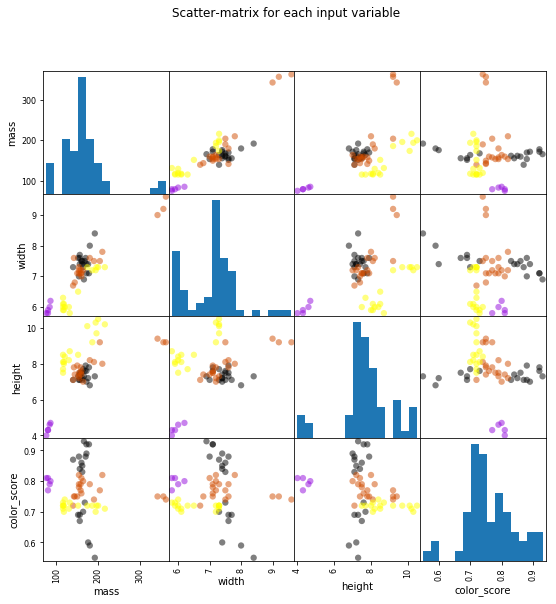

In [15]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('images/scatter_matrix_cmap')
plt.show()